In [1]:
import os
print(os.getcwd())

C:\Users\Nicolò\Documents\GitHub\DWM-Project\Progetto


In [2]:
import pandas as pd 
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")


In [3]:
print("data.shape:", data.shape)
print("data.index:", data.index)
print("data.columns:", data.columns)
print("data_test.columns:", data_test.columns)

data.shape: (3000, 23)
data.index: RangeIndex(start=0, stop=3000, step=1)
data.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')
data_test.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')


In [4]:
data.drop(['homepage'],axis=1,inplace=True)

### data["genres"]

In [5]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [6]:
def convertAll(data):
    import math
    import datetime

    data["release_date"] = pd.to_datetime(data["release_date"])
    #fix della data in quanto ci sono date che superano il 2021
    i=0
    maxDate = datetime.datetime(2020, 1, 1)
    n_elem = data.shape[0]
    while i<n_elem:
        if data['release_date'][i]>maxDate:
            new_year=(data['release_date'][i].year)-100
            new_date = datetime.datetime(new_year, data['release_date'][i].month, data['release_date'][i].day, 0, 0, 0)
            data['release_date'][i] = new_date
        i+=1
    i=0
    n_elem = data.shape[0]
    while i<n_elem:
        if isinstance(data["genres"][i], float):
            if math.isnan(data["genres"][i]):
                i+=1
                continue
        data["genres"][i]=eval(data["genres"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["production_countries"][i], float):
            if math.isnan(data["production_countries"][i]):
                i+=1
                continue
        data["production_countries"][i]=eval(data["production_countries"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["spoken_languages"][i], float):
            if math.isnan(data["spoken_languages"][i]):
                i+=1
                continue
        data["spoken_languages"][i]=eval(data["spoken_languages"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["Keywords"][i], float):
            if math.isnan(data["Keywords"][i]):
                i+=1
                continue
        data["Keywords"][i]=eval(data["Keywords"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["cast"][i], float):
            if math.isnan(data["cast"][i]):
                i+=1
                continue
        data["cast"][i]=eval(data["cast"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["crew"][i], float):
            if math.isnan(data["crew"][i]):
                i+=1
                continue
        data["crew"][i]=eval(data["crew"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["production_companies"][i], float):
            if math.isnan(data["production_companies"][i]):
                i+=1
                continue
        data["production_companies"][i]=eval(data["production_companies"][i])
        i+=1


In [7]:
convertAll(data)


E:\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\anaconda\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\anaconda\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

In [8]:
def get_words (data):
    import math
    descrizioni = []
    i=0
    while i<1000:
        if isinstance(data["overview"][i], float):
            if math.isnan(data["overview"][i]):
                empty_list=[]
                descrizioni += empty_list
                i+=1
                continue
        desc = data["overview"][i]         # this is a string
        words = desc.split() # this is a list
        words = set(words)     # create a set
        descrizioni += [words] # append words to the list
        i=i+1
    return descrizioni

In [9]:
lyrics_word_split = get_words(data)

print ( lyrics_word_split[3] )

{'for', 'she', 'child', 'that', 'reach', 'With', 'a', 'rely', 'pregnant', 'alone', 'in', 'memories', 'him,', 'convince', 'cost', 'on', 'exist.', 'and', 'not', 'all', 'Balan)', 'herself', '(Vidya', 'relentless', 'seems.', 'realises', 'what', 'does', 'life.', 'search', 'from', 'Bagchi', 'missing', 'even', 'begins', 'own', 'dead', 'She', 'city', 'husband', 'clues', 'London', 'unborn', 'months', 'everyone', 'Seven', 'about', 'the', 'when', 'unravel', 'of', 'seem', 'find', 'nothing', 'determined', 'is', 'festive', 'her', 'husband.', 'slowly', 'at', '-', 'it', 'Arnab', 'except', 'Vidya', 'fragments', 'arrives', 'city,', 'soaked', 'lies,', 'Bagchi.', 'end', 'truth', 'tries', 'Kolkata', 'In', 'to'}


In [10]:
def jaccard(a,b):
    return len(a & b) / len( a | b)

In [11]:
jaccard(lyrics_word_split[0],lyrics_word_split[123])

0.06896551724137931

In [12]:
def most_similar_jaccard(film_ricerca, lyrics_word_split):
    most_similar_id=1
    jaccard_most_similar=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[2])
    list_size=len(lyrics_word_split)
    current_id=2
    while current_id<list_size:
        current_sim=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[current_id])
        if current_sim>jaccard_most_similar:
            jaccard_most_similar=current_sim
            most_similar_id=current_id
        current_id=current_id+1
    
    return most_similar_id, jaccard_most_similar

sim_id, sim_value = most_similar_jaccard(0, lyrics_word_split)

In [13]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [14]:
import matplotlib.pyplot as plt
#data_with_budget: array tolti gli elementi con budget = 0
data_with_budget = data[data["budget"] != 0]
print("data_with_budget.shape:", data_with_budget.shape)

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(data_with_budget.iloc[:, 2], data_with_budget.iloc[:, 21])

ax.set_xlabel("Budget per movie", fontsize=10)
ax.set_ylabel("Revenue per movie", fontsize=10)
ax.set_title('Revenue based on budget per movie', fontsize=20)

data_with_budget.shape: (2188, 22)


Text(0.5, 1.0, 'Revenue based on budget per movie')

In [15]:
# The number of the beast
sum(data_with_budget['revenue'] <= 10000000)

666

In [16]:
import numpy as np

#from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans

#matrix budget-revenue
#matrice = [len(data_with_budget)][2]
#br = [data_with_budget['budget'], data_with_budget['revenue']]

#k_means = KMeans(n_clusters=5, n_init=1)
#k_means.fit(br)


#fig, ax = plt.subplots(figsize=(5,5))

#ax.scatter(br.iloc[0, :], br.iloc[1, :], c=k_means.labels_)

E:\anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


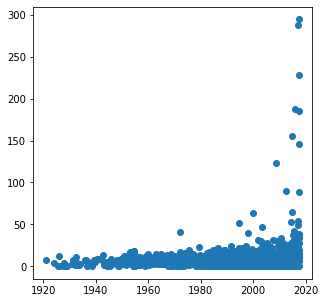

In [17]:
from datetime import datetime
import matplotlib.pyplot as plt

data = data.sort_values(by="release_date")
data["release_date"] = pd.to_datetime(data["release_date"])

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(data['release_date'], data['popularity'])


In [18]:
#aggiunta la colonna anno di uscita
#per evitare errori usare il .dt per estrarre info dalle date
data["release_year"]=data["release_date"].dt.year


In [19]:
# Si vuole sviluppare un algoritmo che, in base al genere del film che uscirà, preveda, grazie ai "vicini", quanto potrebbe
# guadagnare al botteghino
# utilizzo dell'algoritmo knn

#out: lista di tutti i generi presenti nel DB
out = []
for lista_generi_per_film in data['genres']:
    if not isinstance(lista_generi_per_film, float):
        for genere in lista_generi_per_film:
            if genere['name'] not in out:
                out.append(genere['name'])
            
print(out)

['Comedy', 'Drama', 'Action', 'Adventure', 'Family', 'Fantasy', 'Romance', 'History', 'Mystery', 'Horror', 'Thriller', 'Crime', 'War', 'Music', 'Western', 'Science Fiction', 'Animation', 'Documentary', 'Foreign', 'TV Movie']


(1960, 2021.8)

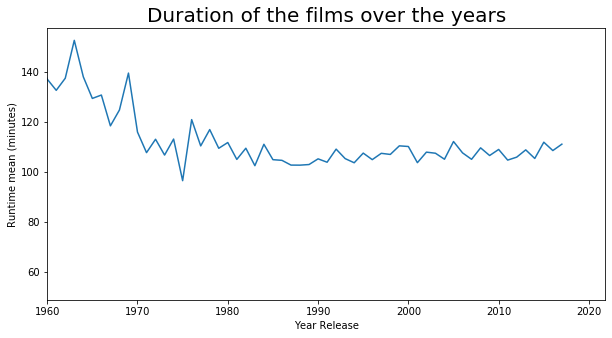

In [20]:
grupByMovies=data['runtime'].groupby(data["release_year"]).describe()
fig, x=plt.subplots(figsize=(10,5))
x.plot(grupByMovies['mean'])
x.set_xlabel("Year Release", fontsize=10)
x.set_ylabel("Runtime mean (minutes)", fontsize=10)
x.set_title('Duration of the films over the years', fontsize=20)

#We made the x axis starting from 1960 in previous year there were way few film in order to have a decent graph
x.set_xlim(1960)

In [21]:
#Proviamo a usare l'algoritmo knn applicato su popularity, budget, runtime per predirre la revenue. 
#Visto che i valori hanno un range molto diverso bisogna prima normalizzarli portandoli in un range 0-1
#Usiamo la formula (x-min(x))/(max(x)-min(x))

In [22]:
#creo un funzione che aggiunge una colonna al database con il campo normalizzato

def normalizza(data, campo):
    #data[campo+"Norm"]=(data[campo]-data[campo].min())/(max(data[campo])-min(data[campo]))
    data[campo+"Norm"]=data[campo]
    
normalizza(data,"popularity")
normalizza(data,"budget")
normalizza(data,"runtime")

#DA FIXARE: fillare valori nan con media al posto dello 0
data.runtimeNorm=data.runtimeNorm.fillna(0)

data.isna().sum()
          

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
release_year                0
popularityNorm              0
budgetNorm                  0
runtimeNorm                 0
dtype: int64

In [23]:
data["runtimeNorm"].fillna(0)
data[ ["revenue","popularityNorm", "runtimeNorm", "budgetNorm"]].info()
dataset = data[ ["revenue","popularityNorm", "runtimeNorm", "budgetNorm"]].astype(float).values


X = dataset[:,1:]
print("X shape", X.shape)

# get class label
y = dataset[:,0]
print("y shape", y.shape)
print (y)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1763 to 2623
Data columns (total 4 columns):
revenue           3000 non-null int64
popularityNorm    3000 non-null float64
runtimeNorm       3000 non-null float64
budgetNorm        3000 non-null int64
dtypes: float64(2), int64(2)
memory usage: 197.2 KB
X shape (3000, 3)
y shape (3000,)
[2.50000000e+06 1.21388000e+06 1.00000000e+00 ... 4.22000000e+02
 3.69907963e+08 9.00242920e+07]


In [24]:
from sklearn import neighbors

kNN = neighbors.KNeighborsClassifier(n_neighbors=7)
kNN.fit(X,y)

y_pred = kNN.predict(X)


print ("predicted", y_pred)
print()
print ("true", y)
print()


from sklearn.metrics import accuracy_score

# compute Accuracy
print ("Accuracy")
print ( accuracy_score(y_true=y, y_pred=y_pred) )

predicted [2.38590000e+04 4.82980000e+04 1.00000000e+00 ... 4.22000000e+02
 2.05366737e+08 9.00242920e+07]

true [2.50000000e+06 1.21388000e+06 1.00000000e+00 ... 4.22000000e+02
 3.69907963e+08 9.00242920e+07]

Accuracy
0.145


In [25]:
# i = 0
# count = 0
# while i < len(y):
#     if (y[i] - y_pred[i]) != 0:
#         print("y = ", y[i], " | y_pred = ", y_pred[i])
#         count+=1
#     i+=1
#     
# print("\n\n\n", count)

In [26]:
## Proviamo a prevedere la revenue con linear regression

# lingua inglese, mese dell'anno, budget, revenue, runtime, popolarità

In [27]:
data["lingua_inglese"] = 0

i=0
n_elem = data.shape[0]
while i<n_elem:
    if data["original_language"][i]=="en":
        data["lingua_inglese"][i]=1
    else:
        data["lingua_inglese"][i]=0
    i+=1

data["lingua_inglese"]

data_test["lingua_inglese"] = 0
i=0
n_elem = data_test.shape[0]
while i<n_elem:
    if data_test["original_language"][i]=="en":
        data_test["lingua_inglese"][i]=1
    else:
        data_test["lingua_inglese"][i]=0
    i+=1

E:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
E:\anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

In [28]:
data["release_month"]=data["release_date"].dt.month
data_test["release_month"]=data_test["release_date"].dt.month


data["release_month"]

AttributeError: Can only use .dt accessor with datetimelike values

In [29]:
# sostituzione dei valori NaN nella colonna runtime con il valore 0

import math

i=0
n_elem = data.shape[0]
while i<n_elem:
    if math.isnan(data["runtime"][i]):
        data["runtime"][i]=0
        print(data["id"][i])
    i+=1

print(data["title"][1336])
print(data["title"][2303])

data.isna().sum()


1336
2303
Rooster Cogburn
Papillon


E:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     0
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
release_year                0
popularityNorm              0
budgetNorm                  0
runtimeNorm                 0
lingua_inglese              0
release_month               0
dtype: int64

In [30]:
data_test.title=data_test.title.fillna("")

print(data_test["release_date"])

0        7/14/07
1        5/19/58
2        5/23/97
3         9/4/10
4        2/11/05
5         2/7/96
6       12/23/10
7        2/11/00
8         3/2/07
9       10/30/99
10        9/1/05
11       6/27/14
12       9/10/80
13       5/16/02
14        9/9/08
15       9/12/10
16       3/26/10
17       4/16/14
18      12/20/79
19      11/18/97
20       9/11/98
21       9/19/08
22        9/8/06
23       8/27/04
24       4/15/16
25      11/15/91
26        7/6/88
27      10/14/16
28       5/16/12
29       8/17/01
          ...   
4368      1/1/16
4369     3/14/08
4370    10/15/99
4371    11/23/10
4372    11/22/11
4373     11/3/76
4374     5/24/91
4375      9/6/02
4376     6/22/70
4377     9/10/14
4378     9/16/05
4379     4/30/15
4380      6/3/16
4381     3/26/70
4382    11/23/06
4383     9/11/12
4384     8/14/87
4385    12/21/01
4386     6/28/91
4387     9/11/13
4388     1/30/06
4389     3/22/13
4390     6/21/91
4391     11/6/09
4392     6/23/15
4393      8/3/01
4394     8/20/04
4395     12/8/

In [31]:
i=0
n_elem = data_test.shape[0]
while i<n_elem:
    if pd.isnull(data_test["release_date"][i]):
        print(data_test["id"][i])
        print(i)
        print(data_test["title"][i])
        print(data_test["release_date"][i])
    i+=1

#solamente a un film mancava la data, dopo averlo cercato abbiamo riempito il campo release_date con il dato corretto
new_date = datetime(2001, 3, 20, 0, 0, 0)
data_test["release_date"][828]=new_date   

3829
828
Jails, Hospitals & Hip-Hop
nan


E:\anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [32]:
# sostituzione dei valori NaN nella colonna runtime con il valore 0

i=0
n_elem = data_test.shape[0]
while i<n_elem:
    if math.isnan(data_test["runtime"][i]):
        data_test["runtime"][i]=0
        print(data_test["id"][i])
    i+=1

3244
4490
4633
6818


E:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [67]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

datasetTrainLinear = data[["revenue", "budget", "runtime", "popularity", "release_month", "lingua_inglese"]].astype(float).values
features = ["budget", "runtime", "popularity", "release_month", "lingua_inglese", "revenue"]

dsTrain = data[0:data.shape[0]-int(data.shape[0]/3)]
dsTest= data[data.shape[0]-int(data.shape[0]/3):data.shape[0]]

In [34]:
X, y = dsTrain[features], dsTrain['revenue']
model = LinearRegression()
model.fit(X, y)
predict = model.predict(dsTest[features])

In [35]:
from sklearn.metrics import mean_squared_error

print ("Train Error: {:.3f}".format( mean_squared_error(y_true = y, 
                                          y_pred = predict[:1000])) )
print ("Test Error : {:.3f}".format( mean_squared_error(y_true = dsTest['revenue'],  
                                          y_pred = predict)) )

ValueError: Found input variables with inconsistent numbers of samples: [2000, 1000]

In [ ]:
print('-'*30)
print(dsTrain[features].isnull().sum())
print('-'*30)
print(dsTest[features].isnull().sum())

In [ ]:
df = pd.DataFrame({'Actual': dsTest['revenue'], 'Predicted': predict})
df

In [ ]:
dsTest.shape[0]

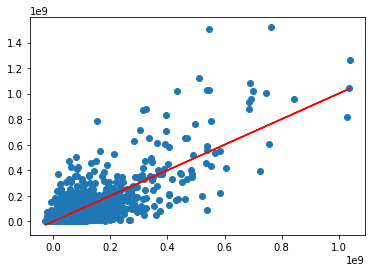

0.5671816059496654

In [69]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split


dataPred=data[features]
X=dataPred.iloc[:,0:5]
y=dataPred.iloc[:,5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66)

lreg=LinearRegression()

lreg.fit(X_train, y_train)

y_pred=lreg.predict(X_test)

plt.scatter(y_pred, y_test)
plt.plot(y_pred, y_pred, color='red')
plt.show()

score=lreg.score(X_train, y_train)
score

In [66]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
2405,1,0.842647
1356,1,0.830685
2465,1,0.891182
1320,1,0.989427
1113,0,0.882702
230,1,0.990121
2036,1,0.811741
178,1,0.876848
2204,1,0.884832
1831,0,0.841759


In [60]:
len(X_test)

2100